In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.stats.diagnostic as diag
import statsmodels.api as sm

Variables:
- Id: Id de la película
- popularity: Índice de popularidad de la película calculado semanalmente
- budget: El presupuesto para la película.
- revenue: El ingreso de la película.
- original_title: El título original de la película, en su idioma original.
- originalLanguage: Idioma original en que se encuentra la película
- title: El título de la película traducido al inglés
- homePage: La página de inicio de la película
- video: Si tiene videos promocionales o no
- director: Director de la película
- runtime: La duración de la película.
- genres: El género de la película.
- genresAmount: Cantidad de géneros que representan la película
- productionCompany: Las compañías productoras de la película.
- productionCoAmount: Cantidad de compañías productoras que participaron en la película
- productionCompanyCountry: Países de las compañías productoras de la película
- productionCountry: Países en los que se llevó a cabo la producción de la película
- productionCountriesAmount: Cantidad de países en los que se rodó la película
- releaseDate: Fecha de lanzamiento de la película
- voteCount: El número de votos en la plataforma para la película.
- voteAvg: El promedio de los votos en la plataforma para la película
- actors: Actores que participan en la película (Elenco)
- actorsPopularity: Índice de popularidad del elenco de la película.
- actorsCharacter: Personaje que interpreta cada actor en la película
- actorsAmount: Cantidad de personas que actúan en la película
- castWomenAmount: Cantidad de actrices en el elenco de la película
- castMenAmount: Cantidad de actores en el elenco de la película.

In [5]:
# Configuración para mostrar todas las columnas
pd.set_option('display.max_columns', None)
# Configuración para mostrar todas las filas
pd.set_option('display.max_rows', None)

In [77]:
archivo_csv = "movies.csv"

# Leer el archivo CSV con pandas, especificando una codificación diferente
datos = pd.read_csv(archivo_csv, encoding='ISO-8859-1')

# Mostrar las primeras filas del archivo
print(datos.head())

# Estadísticas descriptivas
#df.describe

   id    budget                            genres  \
0   5   4000000                      Crime|Comedy   
1   6  21000000             Action|Thriller|Crime   
2  11  11000000  Adventure|Action|Science Fiction   
3  12  94000000                  Animation|Family   
4  13  55000000              Comedy|Drama|Romance   

                                            homePage  \
0          https://www.miramax.com/movie/four-rooms/   
1                                                NaN   
2  http://www.starwars.com/films/star-wars-episod...   
3              http://movies.disney.com/finding-nemo   
4                                                NaN   

                            productionCompany productionCompanyCountry  \
0                        Miramax|A Band Apart                    US|US   
1  Universal Pictures|Largo Entertainment|JVC                 US|US|JP   
2                  Lucasfilm|20th Century Fox                    US|US   
3                                       Pixar   

In [20]:
datos.columns

Index(['id', 'budget', 'genres', 'homePage', 'productionCompany',
       'productionCompanyCountry', 'productionCountry', 'revenue', 'runtime',
       'video', 'director', 'actors', 'actorsPopularity', 'actorsCharacter',
       'originalTitle', 'title', 'originalLanguage', 'popularity',
       'releaseDate', 'voteAvg', 'voteCount', 'genresAmount',
       'productionCoAmount', 'productionCountriesAmount', 'actorsAmount',
       'castWomenAmount', 'castMenAmount'],
      dtype='object')

In [21]:
print(datos.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         10000 non-null  int64  
 1   budget                     10000 non-null  int64  
 2   genres                     9947 non-null   object 
 3   homePage                   4193 non-null   object 
 4   productionCompany          9543 non-null   object 
 5   productionCompanyCountry   8720 non-null   object 
 6   productionCountry          9767 non-null   object 
 7   revenue                    10000 non-null  float64
 8   runtime                    10000 non-null  int64  
 9   video                      9514 non-null   object 
 10  director                   9926 non-null   object 
 11  actors                     9920 non-null   object 
 12  actorsPopularity           9913 non-null   object 
 13  actorsCharacter            9953 non-null   obje

# 1. ¿Cuáles son las 10 películas que contaron con más presupuesto? #

In [58]:
datos['budget'] = pd.to_numeric(datos['budget'], errors='coerce')

# Ordenar el DataFrame por 'budget' en orden descendente
top_10_presupuesto = datos.sort_values(by='budget', ascending=False).head(10)

# Mostrar las 10 películas con más presupuesto
print(top_10_presupuesto[['id','title', 'budget']])

          id                                originalTitle     budget
716     1865  Pirates of the Caribbean: On Stranger Tides  380000000
4710   99861                      Avengers: Age of Ultron  365000000
5952  299534                            Avengers: Endgame  356000000
5953  299536                       Avengers: Infinity War  300000000
163      285     Pirates of the Caribbean: At World's End  300000000
4953  141052                               Justice League  300000000
607     1452                             Superman Returns  270000000
3791   38757                                      Tangled  260000000
7134  420818                                The Lion King  260000000
280      559                                 Spider-Man 3  258000000


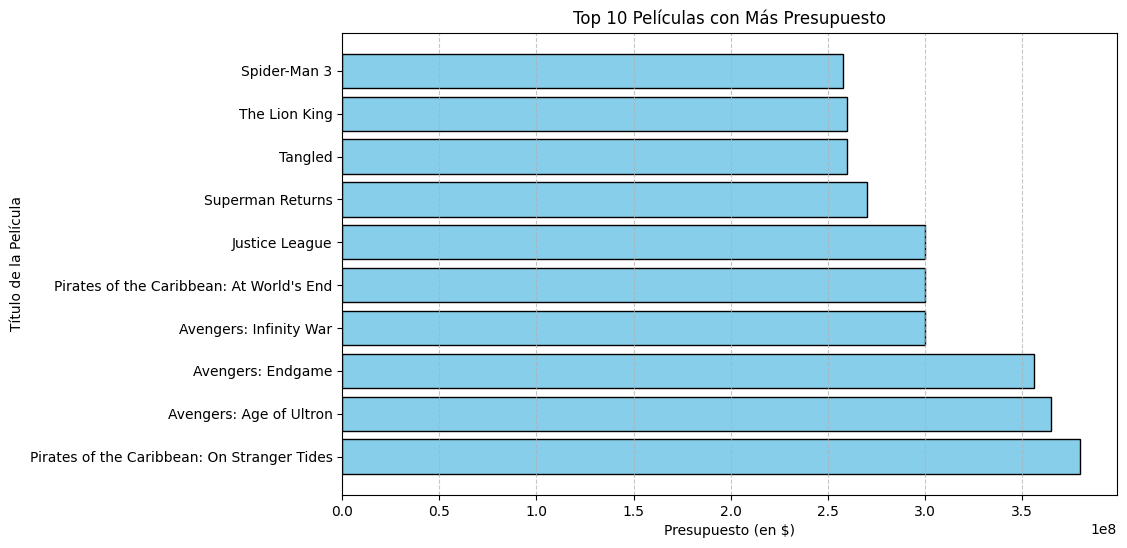

In [29]:
plt.figure(figsize=(10, 6))
plt.barh(top_10_presupuesto['originalTitle'], top_10_presupuesto['budget'], color='skyblue', edgecolor='black')

# Añadir título y etiquetas
plt.title('Top 10 Películas con Más Presupuesto')
plt.xlabel('Presupuesto (en $)')
plt.ylabel('Título de la Película')

# Mostrar la gráfica
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# 2. ¿Cuáles son las 10 películas que más ingresos tuvieron? #

In [ ]:
datos['revenue'] = pd.to_numeric(datos['revenue'], errors='coerce')

# Ordenar el DataFrame por 'budget' en orden descendente
top_10_presupuesto = datos.sort_values(by='revenue', ascending=False).head(10)

# Mostrar las 10 películas con más presupuesto
print(top_10_presupuesto[['id','title', 'revenue']])

          id                 originalTitle       revenue
3210   19995                        Avatar  2.847246e+09
5952  299534             Avengers: Endgame  2.797801e+09
307      597                       Titanic  2.187464e+09
4947  140607  Star Wars: The Force Awakens  2.068224e+09
5953  299536        Avengers: Infinity War  2.046240e+09
4914  135397                Jurassic World  1.671713e+09
7134  420818                 The Lion King  1.667635e+09
9049  634649       Spider-Man: No Way Home  1.631853e+09
3397   24428                  The Avengers  1.518816e+09
5087  168259                     Furious 7  1.515048e+09


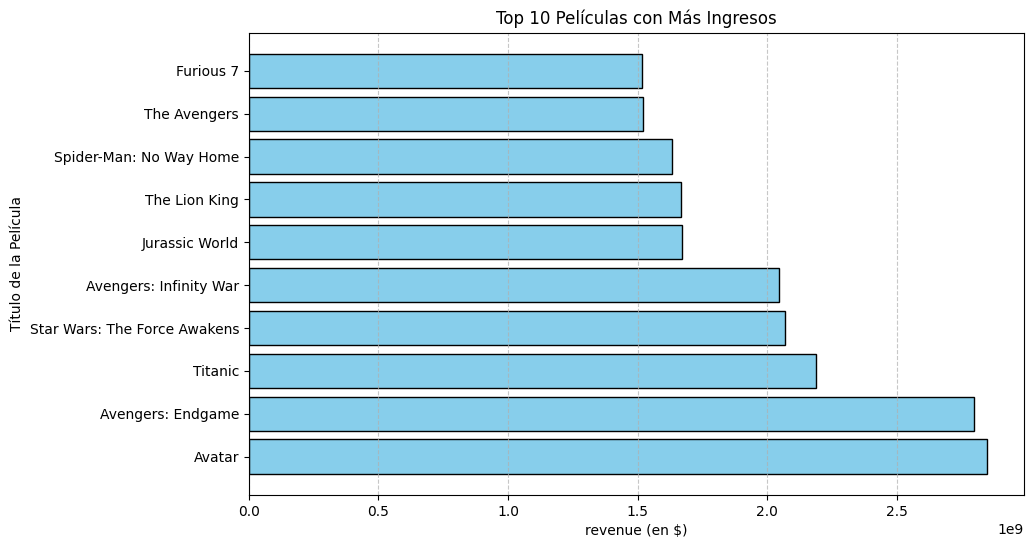

In [31]:
plt.figure(figsize=(10, 6))
plt.barh(top_10_presupuesto['title'], top_10_presupuesto['revenue'], color='skyblue', edgecolor='black')

# Añadir título y etiquetas
plt.title('Top 10 Películas con Más Ingresos')
plt.xlabel('revenue (en $)')
plt.ylabel('Título de la Película')

# Mostrar la gráfica
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# 3. ¿Cuál es la película que más votos tuvo? #

In [86]:
datos['voteCount'] = pd.to_numeric(datos['voteCount'], errors='coerce')

# Ordenar el DataFrame por 'budget' en orden descendente
Mayor_votos = datos.sort_values(by='voteCount', ascending=False).head(1)
#Mayor_votos_reset = Mayor_votos.reset_index(drop=True)
# Mostrar las 10 películas con más presupuesto
print("La pelicula con mayor votos es: \n")
print(Mayor_votos[['id','title', 'voteCount']])

La pelicula con mayor votos es: 

         id      title  voteCount
3511  27205  Inception      30788


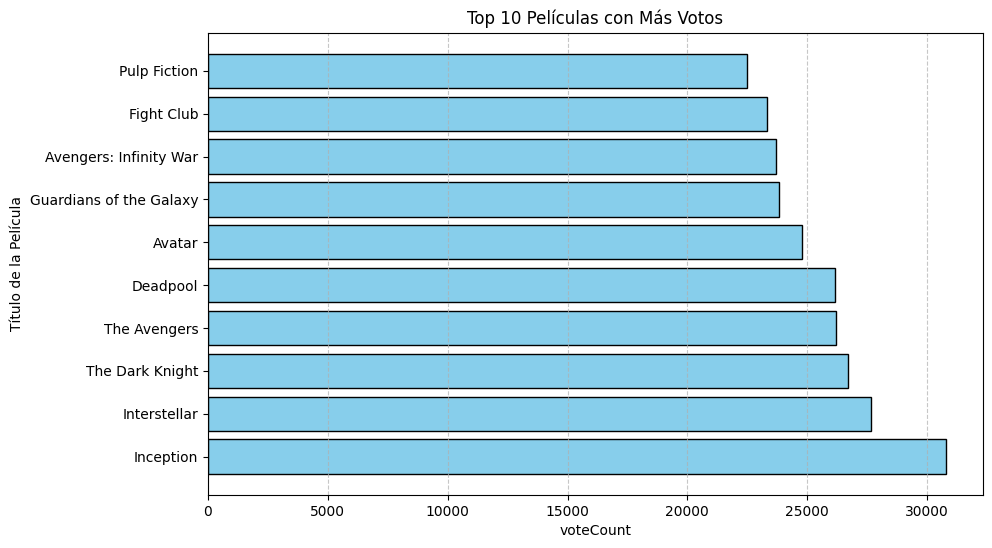

In [ ]:
plt.figure(figsize=(10, 6))
plt.barh(Mayor_votos['title'], Mayor_votos['voteCount'], color='skyblue', edgecolor='black')

# Añadir título y etiquetas
plt.title('Top 10 Películas con Más Votos')
plt.xlabel('voteCount')
plt.ylabel('Título de la Película')

# Mostrar la gráfica
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# 4. ¿Cuál es la peor película de acuerdo a los votos de todos los usuarios? #

In [85]:
datos['voteCount'] = pd.to_numeric(datos['voteCount'], errors='coerce')
peor_pelicula = (datos.sort_values(by='voteAvg', ascending=True).head(1))
print("La peor pelicula de acuerdo a los votos de todos los usuarios es: \n")
print(peor_pelicula[['id','voteAvg', 'title']])

La peor pelicula de acuerdo a los votos de todos los usuarios es: 

          id  voteAvg                                              title
9786  820530      1.3  DAKAICHI -I'm Being Harassed by the Sexiest Ma...


# 5. ¿Cuántas películas se hicieron en cada año?  #

# 6. ¿Cuál es el género principal de las 20 películas más recientes?  #

##### ¿Cuál es el género principal que predomina en el conjunto de datos? Represéntelo usando un gráfico. #####

###### 1. ¿A qué género principal pertenecen las películas más largas? ######

# 7. ¿Las películas de qué genero principal obtuvieron mayores ganancias?
#

# 8. ¿La cantidad de actores influye en los ingresos de las películas? ¿se han hecho películas con más actores en los últimos años? # 

# 9. ¿Es posible que la cantidad de hombres y mujeres en el reparto influya en la popularidad y los ingresos de las películas? #

# 10. ¿Quiénes son los directores que hicieron las 20 películas mejor calificadas?#

# 11. ¿Cómo se correlacionan los presupuestos con los ingresos? ¿Los altos presupuestos significan altos ingresos? Haga los gráficos que necesite, histograma, diagrama de dispersión #

In [52]:
id_pelicula = 275  # Sustituye con el ID que te interese

# Buscar el título de la película según el ID
titulo_pelicula = datos.loc[datos['id'] == id_pelicula, 'originalTitle'].iloc[0]

# Imprimir el título de la película
print(titulo_pelicula)

Fargo


In [69]:
variable = (datos.sort_values(by='voteAvg', ascending=True).head(10))
print(variable[['voteAvg', 'title']])

      voteAvg                                      originalTitle
9786      1.3  <U+5287><U+5834><U+7248> <U+62B1><U+304B><U+30...
9996      1.5                                         El paseo 6
9791      1.5                           My Father's Other Family
9706      1.5                  DRagON BALL P2 2wice dropda bbeet
9944      1.5                Harry Potter: Different Perspective
9768      2.0  American Pie Revealed: The Complete Story of A...
9693      2.0  <U+4F59><U+751F>,<U+8BF7><U+591A><U+6307><U+6559>
9694      2.0               Five Nights at Freddy's: Home Breach
9499      2.0  The Real Spider-Man: The Making of The Green G...
9515      2.0  <U+0411><U+0435><U+0441> <U+041F><U+043E><U+04...
